# "2019 August Portfolio BackTest"
> "2019 August portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [21]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [22]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [23]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [24]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [25]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190801].loc[df_testp.Date<20190901].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [26]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [27]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [28]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2514,LANDEC CORP \CA\,20190801,LNDC,0.0,1.0,0.136192,0.362625,0.501183,0.967033,...,0.995421,1.005714,0.961538,1.023674,1.005550,1.000000,1.000000,1.000000,1.000000,0
1,2515,MICROSOFT CORP,20190801,MSFT,-1.0,1.0,0.156042,0.337610,0.506348,0.957627,...,0.979864,0.965741,0.991598,1.018758,1.004380,0.961538,0.967033,0.989927,0.995421,1
2,2516,TAYLOR DEVICES INC,20190802,TAYD,-1.0,-1.0,0.138316,0.443081,0.418603,0.970571,...,1.003790,1.013974,0.957195,1.015058,1.018885,0.953459,0.926057,0.965763,0.975377,2
3,2517,Seagate Technology plc,20190802,STX,0.0,1.0,0.127353,0.395294,0.477353,0.994436,...,1.004674,1.005401,0.989094,0.997762,1.012562,0.912647,0.898804,0.951455,0.979074,3
4,2518,APPIPHANY TECHNOLOGIES HOLDINGS CORP,20190802,APHD,0.0,1.0,0.114472,0.384866,0.500662,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.902693,0.893803,0.944043,0.983650,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2599,INTUIT INC,20190830,INTU,1.0,1.0,0.131513,0.350109,0.518378,0.985574,...,1.013698,0.985574,1.000000,1.007424,1.020956,0.265278,0.591853,1.577688,1.812665,86
87,2600,PORTSMOUTH SQUARE INC,20190830,PRSI,-1.0,1.0,0.145089,0.338330,0.516582,0.925000,...,0.925000,0.925000,1.000000,1.000000,1.000000,0.265278,0.583315,1.566472,1.837495,87
88,2601,KOSS CORP,20190830,KOSS,1.0,1.0,0.121440,0.331874,0.546686,1.051136,...,1.090909,1.051136,1.000000,1.032432,1.005236,0.265278,0.539566,1.448986,1.699683,88
89,2602,SANTA FE FINANCIAL CORP,20190830,SFEF,1.0,1.0,0.149238,0.336212,0.514550,1.002967,...,1.068249,1.002967,1.000000,1.065089,1.000000,0.265278,0.567157,1.572479,1.854199,89


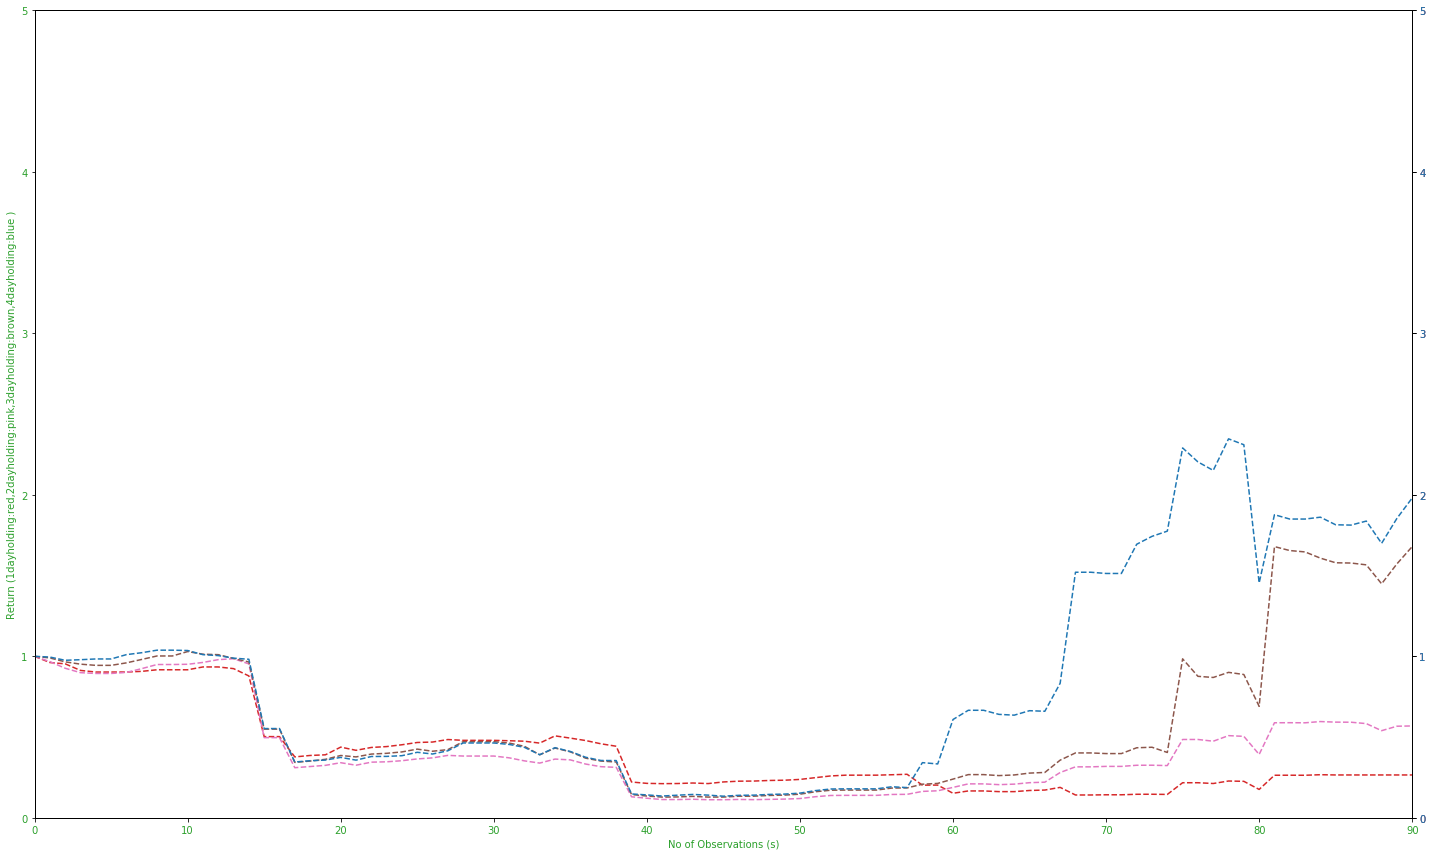

In [29]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [30]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [31]:
#hide_input
df_long['indexx']=range(len(df_long))

In [32]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [33]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,2514,LANDEC CORP \CA\,20190801,LNDC,0.0,1.0,0.136192,0.362625,0.501183,...,0.995421,1.005714,0.961538,1.023674,1.005550,1.000000,1.000000,1.000000,1.000000,0
1,1,2515,MICROSOFT CORP,20190801,MSFT,-1.0,1.0,0.156042,0.337610,0.506348,...,0.979864,0.965741,0.991598,1.018758,1.004380,0.961538,0.967033,0.989927,0.995421,1
2,3,2517,Seagate Technology plc,20190802,STX,0.0,1.0,0.127353,0.395294,0.477353,...,1.004674,1.005401,0.989094,0.997762,1.012562,0.953459,0.926057,0.965763,0.975377,2
3,4,2518,APPIPHANY TECHNOLOGIES HOLDINGS CORP,20190802,APHD,0.0,1.0,0.114472,0.384866,0.500662,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.943061,0.920904,0.958240,0.979936,3
4,5,2519,RICHARDSON ELECTRONICS LTD/DE,20190805,RELL,1.0,1.0,0.148661,0.338158,0.513181,...,1.027273,1.007273,1.000000,1.009025,1.010733,0.943061,0.920904,0.958240,0.979936,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,85,2603,INTERGROUP CORP,20190830,INTG,0.0,1.0,0.151591,0.311423,0.536986,...,0.998969,0.998969,1.000000,1.000000,1.000000,0.554283,1.469374,4.617904,4.816793,83
84,86,2599,INTUIT INC,20190830,INTU,1.0,1.0,0.131513,0.350109,0.518378,...,1.013698,0.985574,1.000000,1.007424,1.020956,0.554283,1.467860,4.613145,4.811829,84
85,87,2600,PORTSMOUTH SQUARE INC,20190830,PRSI,-1.0,1.0,0.145089,0.338330,0.516582,...,0.925000,0.925000,1.000000,1.000000,1.000000,0.554283,1.446684,4.580349,4.877742,85
86,88,2601,KOSS CORP,20190830,KOSS,1.0,1.0,0.121440,0.331874,0.546686,...,1.090909,1.051136,1.000000,1.032432,1.005236,0.554283,1.338183,4.236823,4.511911,86


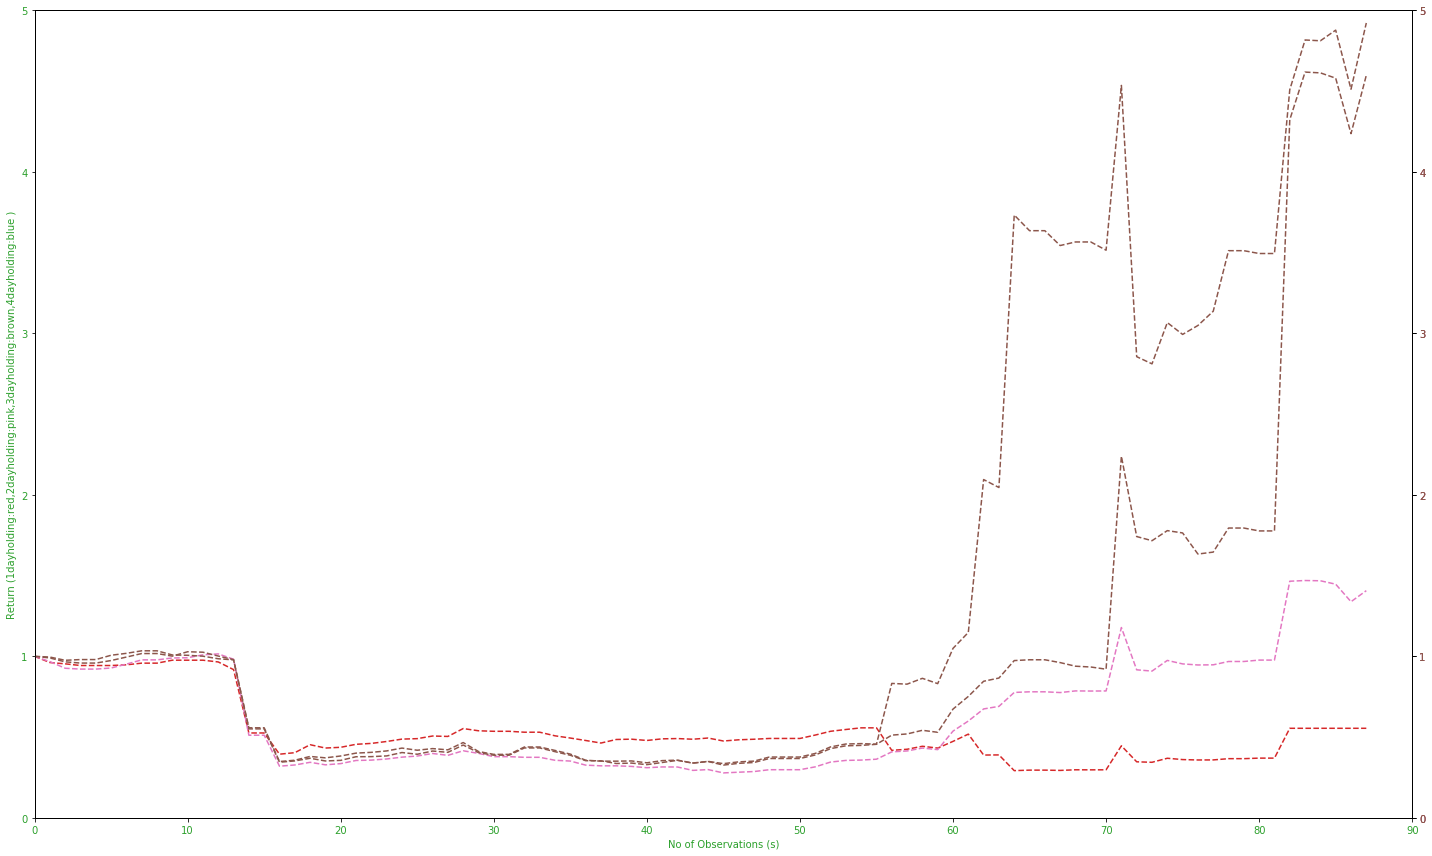

In [34]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [35]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [36]:
#hide_input
df_short['indexx']=range(len(df_short))

In [37]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [38]:
#hide_input
df_short

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2,2516,TAYLOR DEVICES INC,20190802,TAYD,-1.0,-1.0,0.138316,0.443081,0.418603,...,1.003790,1.013974,0.957195,1.015058,1.018885,1.000000,1.000000,1.000000,1.000000,0
1,38,2552,AdvanSource Biomaterials Corp,20190822,ASNB,1.0,-1.0,0.094459,0.472902,0.432639,...,0.416667,0.833333,0.500000,1.000000,1.000000,0.957195,0.970571,0.985185,1.003790,1
2,75,2591,PATRIOT GOLD CORP,20190829,PGOL,1.0,-1.0,0.144417,0.458425,0.397158,...,0.962162,1.000000,1.000000,0.890000,1.081081,0.478597,0.404404,0.410494,0.418246,2


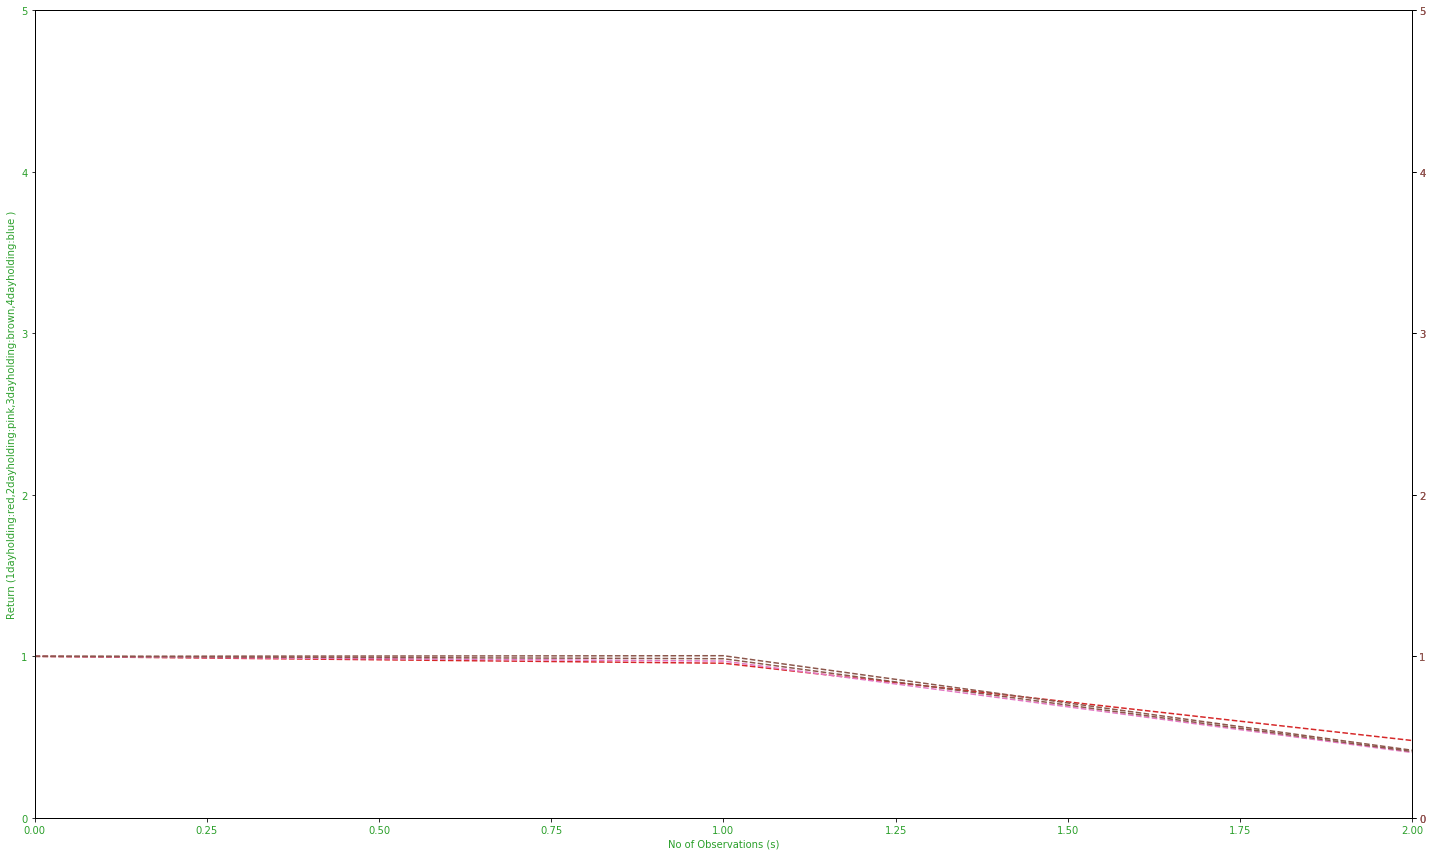

In [39]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,10
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()